<div style="font-size: 28px; color: #ffffff; font-weight: bold; text-align: center; margin-bottom: 18px; background-color: #3498db; padding: 12px; border-radius: 10px;">
  Importing Libraries
</div>

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer,SimpleImputer,MissingIndicator
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, matthews_corrcoef
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


import warnings
warnings.filterwarnings("ignore")


<div style="font-size: 28px; color: #ffffff; font-weight: bold; text-align: center; margin-bottom: 18px; background-color: #3498db; padding: 12px; border-radius: 10px;">
  Loading Dataset
</div>

In [110]:
train = pd.read_csv('/kaggle/input/playground-series-s4e8/train.csv')

test = pd.read_csv('/kaggle/input/playground-series-s4e8/test.csv')

sample_submission = pd.read_csv('/kaggle/input/playground-series-s4e8/sample_submission.csv')

In [6]:
print('train shape :',train.shape)
print('test shape :',test.shape)

train shape : (3116945, 22)
test shape : (2077964, 21)


<div style="font-size: 28px; color: #ffffff; font-weight: bold; text-align: center; margin-bottom: 18px; background-color: #3498db; padding: 12px; border-radius: 10px;">
  Basic info about Data
</div>

In [5]:
train.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [111]:
test.head()

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,3116945,8.64,x,NaN,n,t,NaN,NaN,w,11.13,...,b,NaN,w,u,w,t,g,NaN,d,a
1,3116946,6.90,o,t,o,f,NaN,c,y,1.27,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
2,3116947,2.00,b,g,n,f,NaN,c,n,6.18,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3,3116948,3.47,x,t,n,f,s,c,n,4.98,...,NaN,NaN,w,NaN,n,t,z,NaN,d,u
4,3116949,6.17,x,h,y,f,p,NaN,y,6.73,...,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u


In [112]:
sample_submission.head()

,id,class
0,3116945,e
1,3116946,e
2,3116947,e
3,3116948,e
4,3116949,e


In [113]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3116945.0,1.558472e+06,899784.661737,0.00,779236.00,1558472.00,2337708.00,3116944.00
cap-diameter,3116941.0,6.309848e+00,4.657931,0.03,3.32,5.75,8.24,80.67
stem-height,3116945.0,6.348333e+00,2.699755,0.00,4.67,5.88,7.41,88.72
stem-width,3116945.0,1.115379e+01,8.095477,0.00,4.97,9.65,15.63,102.90


class
p    1705396
e    1411549
Name: count, dtype: int64


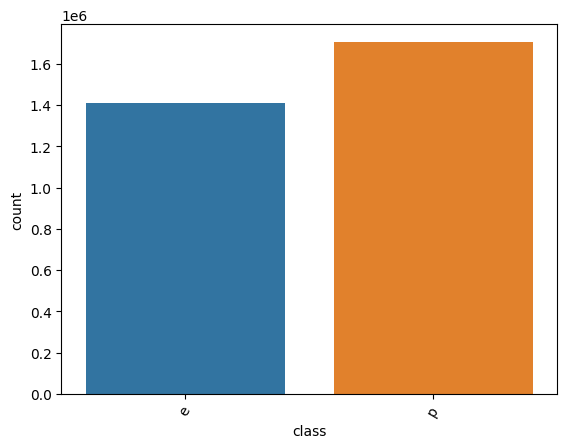

In [114]:
print(train['class'].value_counts())
sns.countplot(x='class',data=train)
plt.xticks(rotation=60)
plt.show()

In [137]:
#adding train and test data

all_df = pd.concat([train,test],axis=0)

In [7]:
all_df.shape

(5194909, 22)

In [115]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5194909 entries, 0 to 2077963
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 object 
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-attachment       object 
 7   gill-spacing          object 
 8   gill-color            object 
 9   stem-height           float64
 10  stem-width            float64
 11  stem-root             object 
 12  stem-surface          object 
 13  stem-color            object 
 14  veil-type             object 
 15  veil-color            object 
 16  has-ring              object 
 17  ring-type             object 
 18  spore-print-color     object 
 19  habitat               object 
 20  season                object 
dtypes: float64(3), object(18)
memory usage: 871.9+ MB


In [138]:
all_df.drop('id',axis=1,inplace=True)

<div style="font-size: 28px; color: #ffffff; font-weight: bold; text-align: center; margin-bottom: 18px; background-color: #3498db; padding: 12px; border-radius: 10px;">
  Exploratory Data Analysis (EDA)
</div>

In [116]:
missing_percentage = all_df.isnull().sum() / len(all_df) * 100

missing_df = pd.DataFrame(missing_percentage, columns=['Missing Percentage'])

# Style the DataFrame
styled_missing_df = missing_df.style.background_gradient(cmap='coolwarm') \
                                      .format("{:.4f}%") \
                                      .set_caption("Percentage of Missing Values by Column") \
                                      .set_properties(**{'text-align': 'center'}) \
                                      .set_table_styles([{
                                          'selector': 'th',
                                          'props': [('font-size', '8pt'),
                                                    ('font-weight', 'bold'),
                                                    ('background-color', '#f7f7f9'),
                                                    ('text-align', 'center')]
                                      }])

styled_missing_df

,Missing Percentage
class,40.0000%
cap-diameter,0.0002%
cap-shape,0.0014%
cap-surface,21.5197%
cap-color,0.0005%
does-bruise-or-bleed,0.0003%
gill-attachment,16.8195%
gill-spacing,40.3863%
gill-color,0.0020%
stem-height,0.0000%


In [8]:
#dropping columns with high percentage

#all_df.drop(columns=['stem-root','veil-type','veil-color','spore-print-color'],inplace=True, axis=1)

In [139]:
num_col = ['cap-diameter','stem-height','stem-width']

cat_col = list(all_df.select_dtypes(include=['object']).columns)
cat_col.remove('class')

In [140]:
# filling missing values of numeric columns 

num_imputer = KNNImputer(n_neighbors=5)
all_df[num_col] = num_imputer.fit_transform(all_df[num_col])

In [141]:
# filling missing values of categorical columns 

cat_imputer = SimpleImputer(strategy='constant',fill_value='Missing')
all_df[cat_col] = cat_imputer.fit_transform(all_df[cat_col])

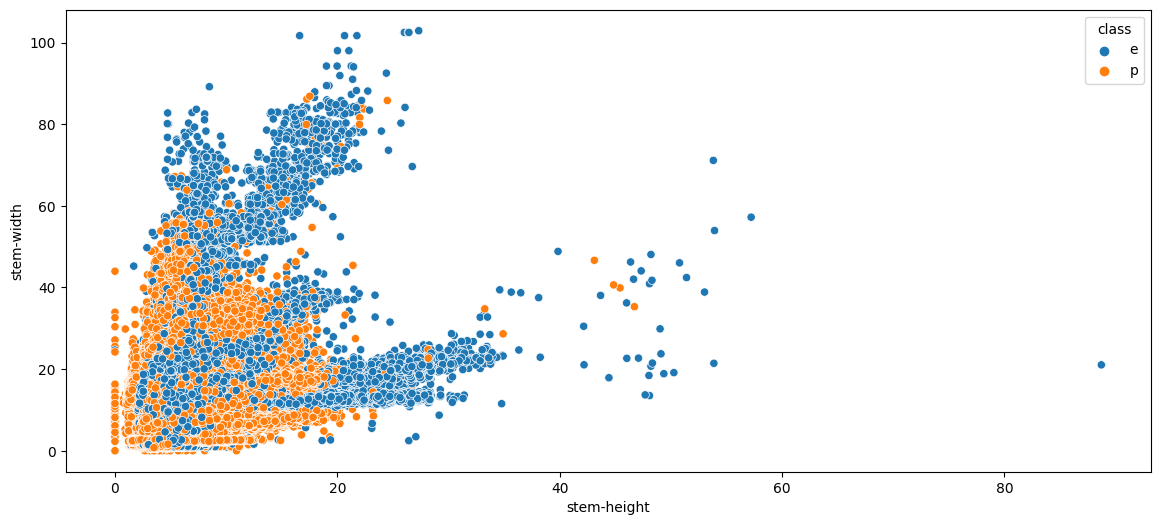

In [120]:
plt.figure(figsize=(14,6))
sns.scatterplot(x='stem-height',y='stem-width',hue='class',data=all_df)
plt.show()

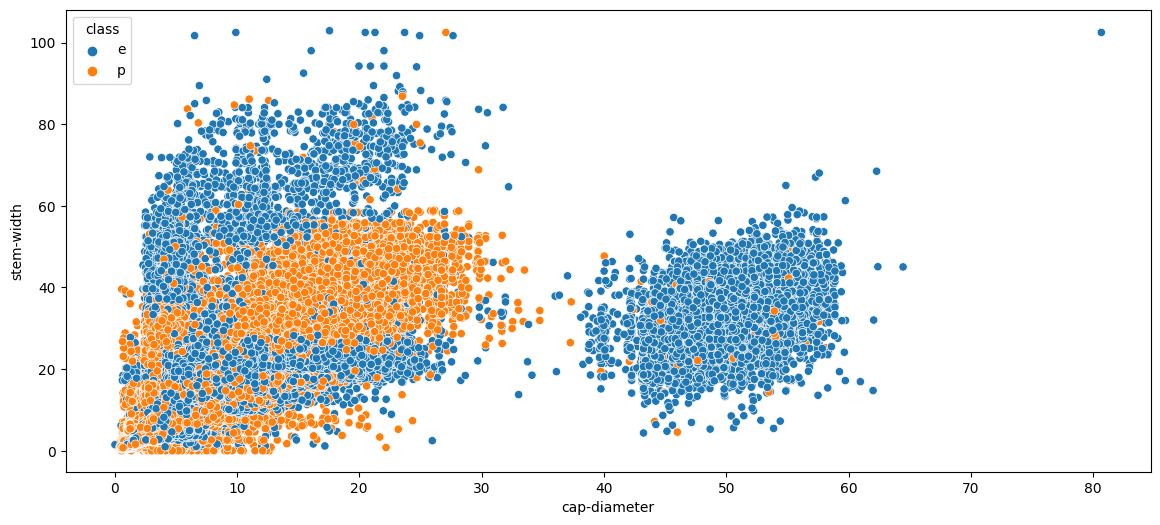

In [121]:
plt.figure(figsize=(14,6))
sns.scatterplot(x='cap-diameter',y='stem-width',hue='class',data=all_df)
plt.show()

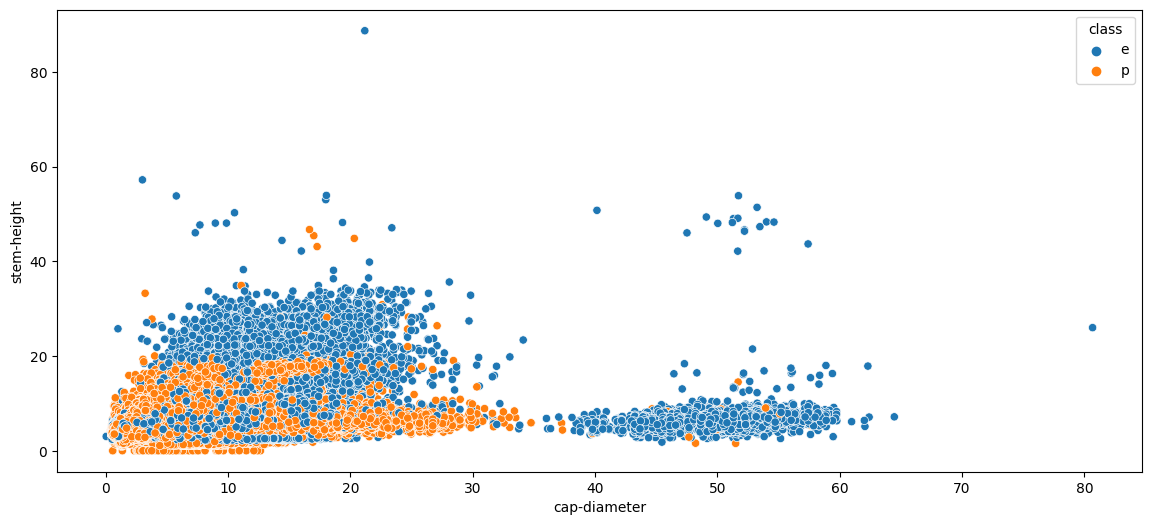

In [122]:
plt.figure(figsize=(14,6))
sns.scatterplot(x='cap-diameter',y='stem-height',hue='class',data=all_df)
plt.show()

In [142]:
%%time
threshold = 1000

def replace_rare_categories(df, columns, threshold):
    for column in columns:
        value_counts = df[column].value_counts()
        rare_categories = value_counts[value_counts < threshold].index
        df[column] = df[column].where(~df[column].isin(rare_categories), 'Rare')

replace_rare_categories(all_df, cat_col, threshold)

# Optional: Print value counts for each column
for column in cat_col:
    print(f"Value counts for {column}:")
    print(all_df[column].value_counts())
    print("\n")


Value counts for cap-shape:
cap-shape
x       2393975
f       1128598
s        607844
b        530525
o        180807
p        178269
c        173956
Rare        935
Name: count, dtype: int64


Value counts for cap-surface:
cap-surface
Missing    1117927
t           767629
s           642160
y           546162
h           474197
g           439869
d           344507
k           214916
e           199630
i           189010
w           182949
l            74960
Rare           993
Name: count, dtype: int64


Value counts for cap-color:
cap-color
n       2263849
y        645689
w        633286
g        351506
e        328814
o        298611
p        153024
r        130020
u        122037
b        102103
k         99503
l         65819
Rare        648
Name: count, dtype: int64


Value counts for does-bruise-or-bleed:
does-bruise-or-bleed
f       4283405
t        911312
Rare        192
Name: count, dtype: int64


Value counts for gill-attachment:
gill-attachment
a          1076994
d         

In [ ]:
"""%%time
ohe = OneHotEncoder(sparse=False, drop='first')
le = LabelEncoder()

one_hot_encoded = ohe.fit_transform(all_df[cat_col])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=ohe.get_feature_names_out(cat_col))

df_encoded = pd.concat([all_df.reset_index(drop=True), one_hot_df], axis=1)

data = df_encoded.drop(cat_col, axis=1)

# Optionally, you can reset the index after concatenation if needed
# train.reset_index(drop=True, inplace=True)"""

In [55]:
"""from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

all_df[cat_col] = ordinal_encoder.fit_transform(all_df[cat_col].astype(str))
"""

In [129]:
le = LabelEncoder()
for col in cat_col:
    all_df[col] = le.fit_transform(all_df[col])

In [130]:
#separating into train and test set

train_df = all_df[:3116945]  
test_df = all_df[3116945:]

test_df.drop('class',axis=1,inplace=True)

In [131]:
train_df['class'] = le.fit_transform(train_df['class'])

In [132]:
X = train_df.drop('class',axis=1)
y = train_df['class']

<div style="font-size: 28px; color: #ffffff; font-weight: bold; text-align: center; margin-bottom: 18px; background-color: #3498db; padding: 12px; border-radius: 10px;">
 Model Building 
</div>

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [134]:
%%time
xgb_params = {
    'n_estimators': 1000,
    'alpha': 0.0002,
    'subsample': 0.60,
    'colsample_bytree': 0.4,
    'max_depth': 13, 
    'min_child_weight': 12,
    'learning_rate': 0.04,
    'gamma': 5.6e-08,
    'tree_method': 'hist',
    'device': 'cuda'
}

model = XGBClassifier(**xgb_params)
model.fit(X_train,y_train)

CPU times: user 52.4 s, sys: 424 ms, total: 52.9 s
Wall time: 46.6 s


XGBClassifier(alpha=0.0002, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5.6e-08, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.04, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=12, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, ...)

In [135]:
y_pred = model.predict(X_test)

In [136]:
print(f"\nMathews Cor Coef: {matthews_corrcoef(y_test, y_pred)}")


Mathews Cor Coef: 0.9845617240700616


<div style="font-size: 28px; color: #ffffff; font-weight: bold; text-align: center; margin-bottom: 18px; background-color: #3498db; padding: 12px; border-radius: 10px;">
 Final Submission 
</div>

In [101]:
#fitting model on whole training data
model.fit(X,y)

prediction = model.predict(test_df)

In [103]:
# Prepare submission
submission = pd.DataFrame({'id': sample_submission['id'], 'class': prediction})
submission['class'] = le.inverse_transform(submission['class'])
submission.to_csv('submission.csv', index=False)

print("Submission file created successfully!!!")

Submission file created successfully!!!


In [104]:
submission

,id,class
0,3116945,e
1,3116946,p
2,3116947,p
3,3116948,p
4,3116949,e
...,...,...
2077959,5194904,p
2077960,5194905,p
2077961,5194906,p
2077962,5194907,e


<div style="font-size: 20px; color: #2c3e50; font-weight: bold; text-align: center; background-color: #ecf0f1; padding: 10px; border-radius: 8px;">
  Please Upvote if you Really liked this! 👍
</div>
